In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from wordcloud import WordCloud

In [2]:
peliculas = pd.read_csv('https://drive.google.com/uc?id=1o15w2plmoGJrUJhc0QbluyTnY0nSWd6j', sep=',')

# Vista previa sobre el contenido del dataset

In [3]:
peliculas.head(5)

,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,spoken_languages,...,vote_average,vote_count,name,backdrop_path,genres_name,countries,productor,directors,release_year,return
0,0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,7.7,5415,Toy Story Collection,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"Animation, Comedy, Family",United States of America,Pixar Animation Studios,John Lasseter,1995,12.451801
1,1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,6.9,2413,NaN,NaN,"Adventure, Fantasy, Family",United States of America,"TriStar Pictures, Teitler Film, Interscope Com...",Joe Johnston,1995,4.043035
2,2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,6.5,92,Grumpy Old Men Collection,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"Romance, Comedy",United States of America,"Warner Bros., Lancaster Gate",Howard Deutch,1995,0.000000
3,3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,6.1,34,NaN,NaN,"Comedy, Drama, Romance",United States of America,Twentieth Century Fox Film Corporation,Forest Whitaker,1995,5.090760
4,4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,5.7,173,Father of the Bride Collection,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,Comedy,United States of America,"Sandollar Productions, Touchstone Pictures",Charles Shyer,1995,0.000000


# Informacion general sobre el contenido del dataset

In [4]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45454 entries, 0 to 45453
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         45454 non-null  int64  
 1   budget             45454 non-null  int64  
 2   id                 45454 non-null  int64  
 3   original_language  45443 non-null  object 
 4   overview           44513 non-null  object 
 5   popularity         45454 non-null  float64
 6   release_date       45454 non-null  object 
 7   revenue            45454 non-null  int64  
 8   runtime            45208 non-null  float64
 9   spoken_languages   45454 non-null  object 
 10  status             45374 non-null  object 
 11  tagline            20426 non-null  object 
 12  title              45454 non-null  object 
 13  vote_average       45454 non-null  float64
 14  vote_count         45454 non-null  int64  
 15  name               4498 non-null   object 
 16  backdrop_path      326

# Analisis estadistico variables cuantitativas

In [10]:
cuantitativas = peliculas.describe(include=['float','int64'])
cuantitativas

,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,45454.000000,4.545400e+04,45454.000000,45454.000000,4.545400e+04,45208.000000,45454.000000,45454.000000,45454.000000,4.545400e+04
mean,22751.735535,4.231015e+06,107987.473666,2.926786,1.121856e+07,94.181273,5.624095,109.983214,1991.883069,6.589107e+02
std,13142.049154,1.742887e+07,112109.679289,6.006277,6.433778e+07,38.328500,1.915383,491.336775,24.057353,7.462918e+04
min,0.000000,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,11368.250000,0.000000e+00,26368.250000,0.389070,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,22750.500000,0.000000e+00,59877.000000,1.131436,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,34126.750000,0.000000e+00,156328.250000,3.694078,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,45537.000000,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


# Analisis estadistico variables cualitativas




In [6]:
cualitativas = peliculas.describe(include=['object'])
cualitativas

,original_language,overview,release_date,spoken_languages,status,tagline,title,name,backdrop_path,genres_name,countries,productor,directors
count,45443,44513,45454,45454,45374,20426,45454,4498,3267,43070,39235,33637,44619
unique,89,44234,17334,1931,6,20270,42197,1695,1122,4065,2389,22669,18830
top,en,No overview found.,2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Which one is the first to return - memory or t...,Blackout,The Bowery Boys,/foe3kuiJmg5AklhtD3skWbaTMf2.jpg,Drama,United States of America,Metro-Goldwyn-Mayer (MGM),John Ford
freq,32251,133,136,22412,45012,9,13,29,29,5006,17868,742,63


# Gráfico de barras de la ganancia por año, tomando los valores de revenue mas significativos

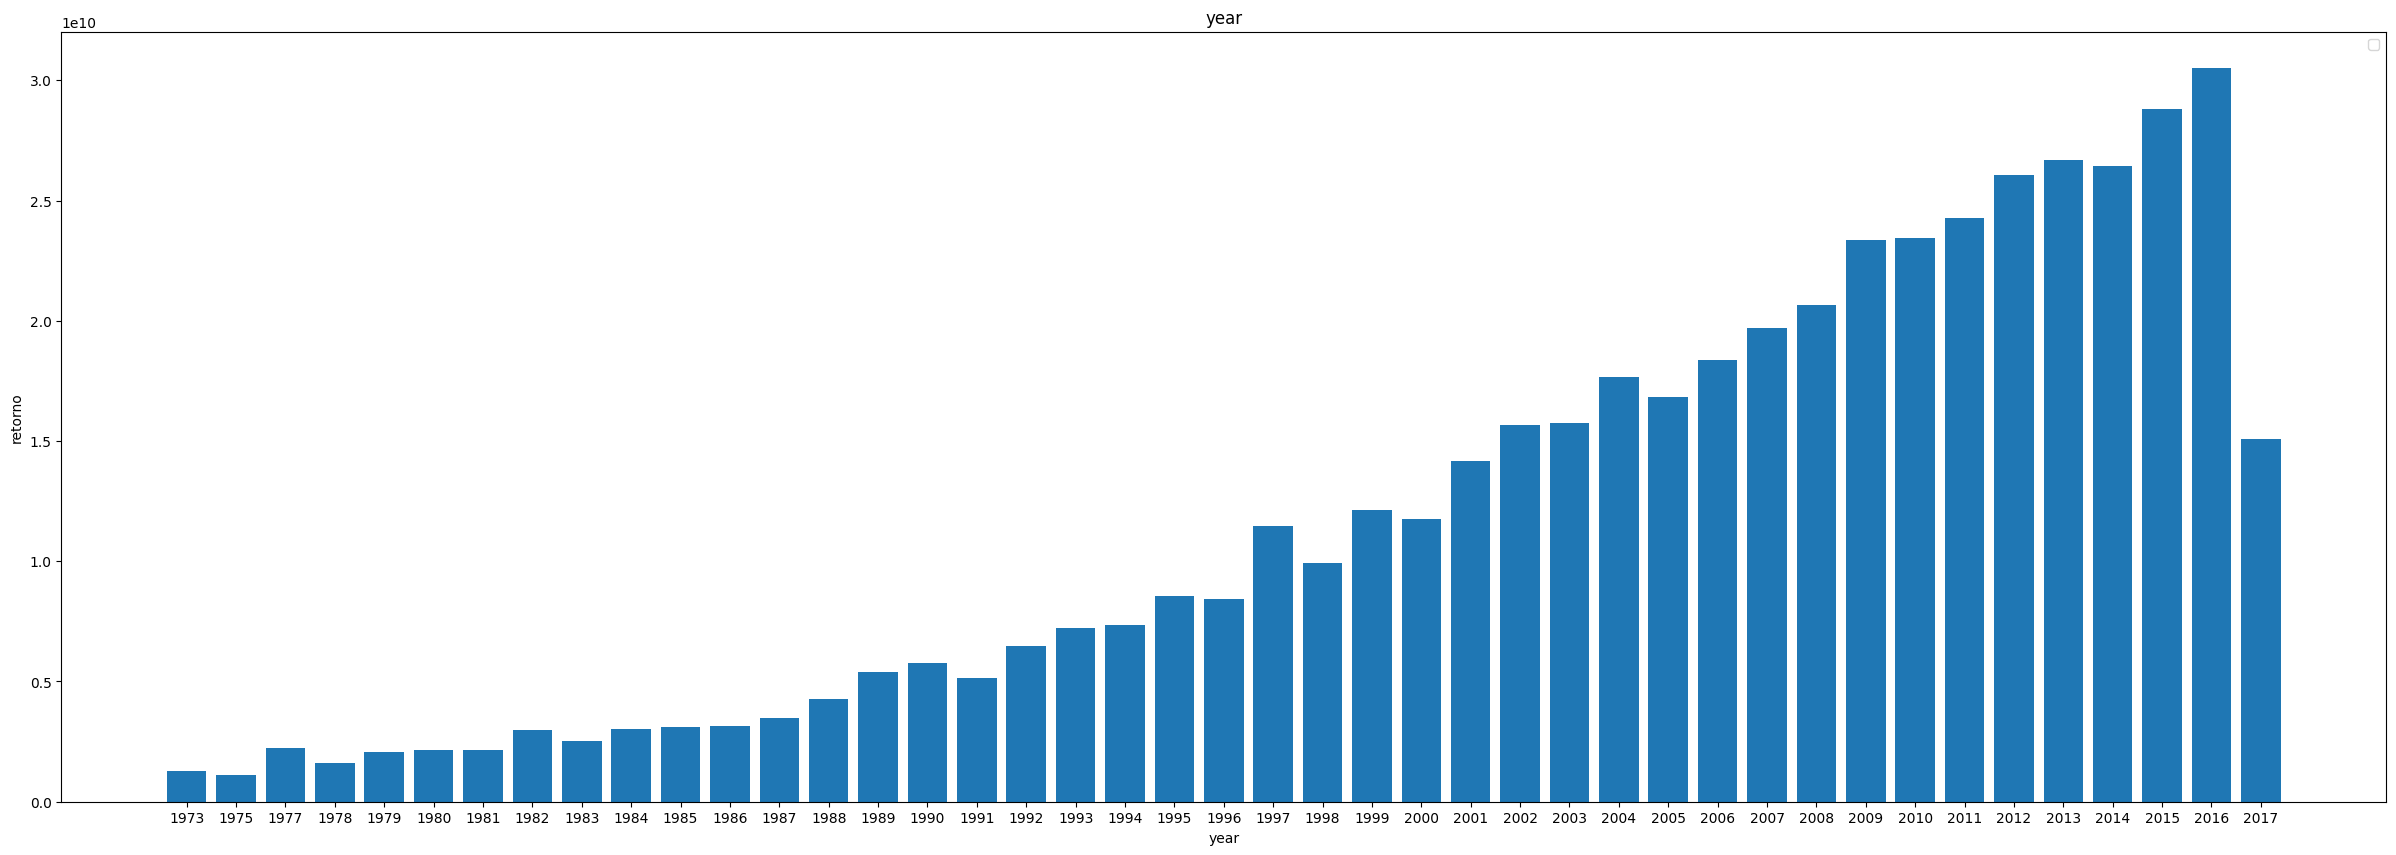

In [7]:
retorno = peliculas.groupby('release_year')['revenue'].sum().reset_index()
retorno = retorno[retorno['revenue'] > 1000000000].reset_index()
year = retorno['release_year'].drop_duplicates().astype(str)
retorno = retorno['revenue'].astype(float)
xi = list(range(len(year)))
plt.figure(figsize=(30,10))
plt.xticks(ticks=xi, labels=year)
plt.bar(year, retorno, width = 0.8)
plt.xlabel('year')
plt.ylabel('retorno')
plt.title('year')


plt.legend()

# Grafico de dispersion




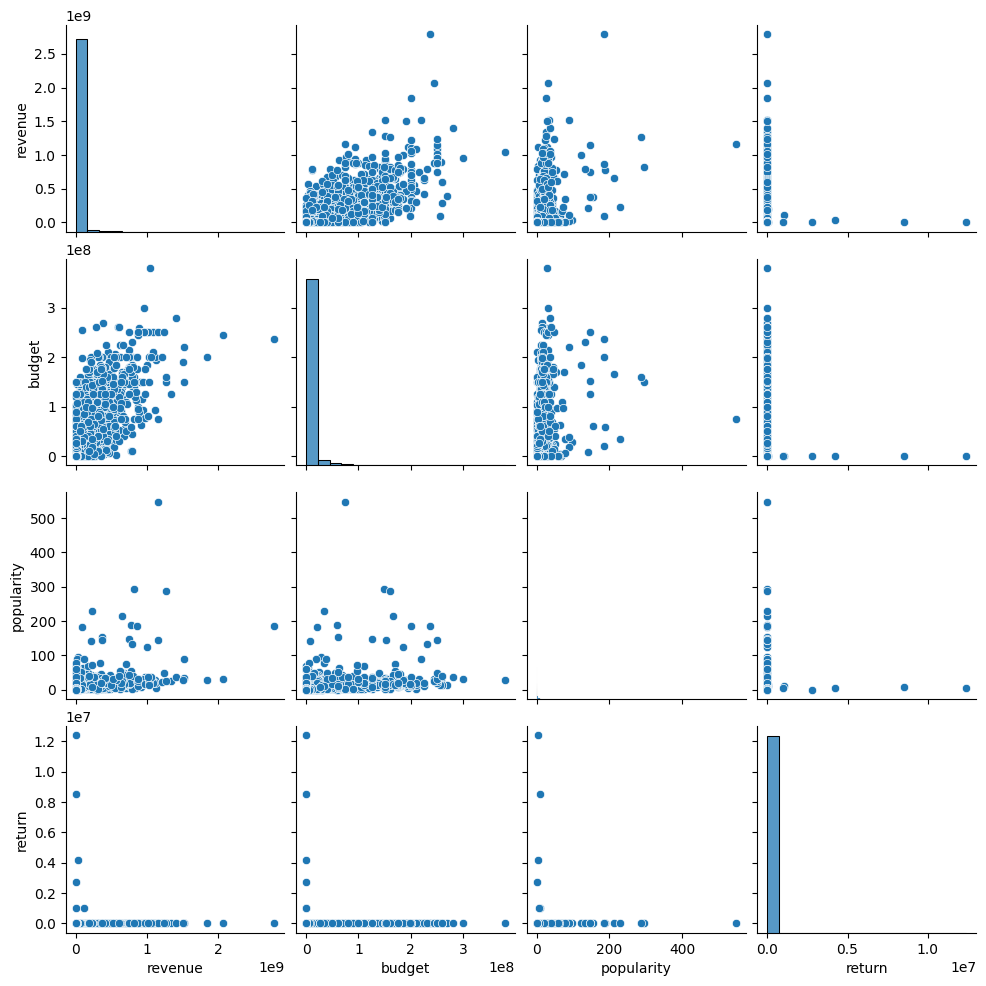

In [8]:
columnas=['revenue', 'budget', 'popularity', 'return']
df_filtrado = peliculas[columnas]
sns.pairplot(df_filtrado)

# Nube de palabras

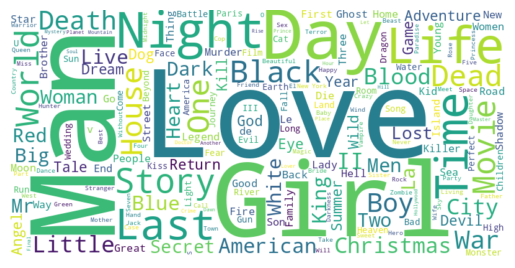

In [9]:
columna_texto = peliculas['title'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(columna_texto)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()